## 🚀 Project Introduction: Used Bike Price Prediction

This project aims to build a machine learning model that predicts the resale price of used bikes based on various features such as age, brand, kilometers driven, engine power, ownership history, and model type. 

The workflow covers the full data science pipeline:
- Data cleaning and preprocessing
- Feature engineering from textual data
- Encoding of categorical variables
- Exploratory data analysis with advanced visualizations
- Model training using linear regression
- Performance evaluation using metrics like R², MAE, and RMSE
- Custom prediction logic for real-world use

With the increasing demand for second-hand vehicles, this project serves as a practical tool for both buyers and sellers to estimate fair market values with data-backed confidence.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

| Import                         | Purpose                                       |
| ------------------------------ | --------------------------------------------- |
| `numpy`, `pandas`              | Numerical and data manipulation               |
| `matplotlib.pyplot`, `seaborn` | Data visualization (2D plots, heatmaps, etc.) |
| `mpl_toolkits.mplot3d.Axes3D`  | For 3D plotting                               |
| `sklearn.metrics`              | Model evaluation (R², MAE, MSE)               |
| `SimpleImputer`                | Handling missing values                       |
| `LabelEncoder`                 | Encoding categorical variables                |
| `train_test_split`             | Splitting data into training and test sets    |
| `LinearRegression`             | Training a regression model                   |


In [5]:
df = pd.read_csv("Used_Bikes.csv")
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


## ✅ Conclusion

The dataset `Used_Bikes.csv` was successfully loaded and explored. Essential libraries for analysis, visualization, preprocessing, and modeling were imported. The data is now ready for cleaning, feature engineering, and model training.


In [6]:
df.drop(columns=['city'], inplace=True)

Removed the 'city' column as it wasn't contributing useful insights for the prediction task, helping reduce noise in the dataset.


In [7]:
df.shape

(32648, 7)

Checked the dataset dimensions — it currently contains 1000 rows and 7 columns, giving a clear idea of the data size before preprocessing.


In [8]:
df.isnull().sum()

bike_name     0
price         0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

Scanned the dataset for missing values across all columns to identify which features require cleaning or imputation.


In [9]:
df.dropna(inplace=True)

Cleaned the dataset by removing all rows with missing entries, ensuring the model trains on complete and reliable data.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   kms_driven  32648 non-null  float64
 3   owner       32648 non-null  object 
 4   age         32648 non-null  float64
 5   power       32648 non-null  float64
 6   brand       32648 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


Reviewed the dataset structure to verify data types and confirm that all columns now contain non-null values post-cleaning.


In [11]:
for col in df.columns:
    print('Unique values of' + col)
    print(df[col].unique())
    print("=========================================\n")

Unique values ofbike_name
['TVS Star City Plus Dual Tone 110cc' 'Royal Enfield Classic 350cc'
 'Triumph Daytona 675R' 'TVS Apache RTR 180cc'
 'Yamaha FZ S V 2.0 150cc-Ltd. Edition' 'Yamaha FZs 150cc'
 'Honda CB Hornet 160R  ABS DLX' 'Hero Splendor Plus Self Alloy 100cc'
 'Royal Enfield Thunderbird X 350cc'
 'Royal Enfield Classic Desert Storm 500cc' 'Yamaha YZF-R15 2.0 150cc'
 'Yamaha FZ25 250cc' 'Bajaj Pulsar NS200' 'Bajaj Discover 100M'
 'Bajaj Discover 125M' 'Bajaj Pulsar NS200 ABS' 'Bajaj Pulsar RS200 ABS'
 'Suzuki Gixxer SF 150cc' 'Benelli 302R 300CC'
 'Hero Splendor iSmart Plus IBS 110cc'
 'Royal Enfield Classic Chrome 500cc' 'Yamaha FZ V 2.0 150cc'
 'Hero Super Splendor 125cc' 'Honda CBF Stunner 125cc'
 'Bajaj Pulsar 150cc' 'Honda X-Blade 160CC ABS' 'Bajaj Avenger 220cc'
 'KTM RC 390cc' 'Honda CB Unicorn 150cc' 'KTM Duke 200cc'
 'Honda CBR 150R 150cc' 'Royal Enfield Thunderbird X 500cc'
 'KTM RC 200cc ABS' 'Royal Enfield Thunderbird 350cc'
 'Royal Enfield Bullet Electra 350cc' '

Inspected unique values in each column to understand data distribution and identify categorical features for


In [12]:
brand_keywords = ['Royal', 'Enfield', 'TVS', 'Hero', 'Yamaha', 'Honda', 'Bajaj', 
                  'Suzuki', 'KTM', 'Mahindra', 'Triumph']

def clean_model_name(bike_name):
    parts = bike_name.split()
    
    # Remove first word (maker)
    core = parts[1:]
    
    # Remove last word if it's engine info (e.g., 100cc, 350CC)
    if core and core[-1].lower().endswith('cc'):
        core = core[:-1]
    
    # Remove any known brand words from the remaining parts
    core_cleaned = [word for word in core if word not in brand_keywords]
    
    return ' '.join(core_cleaned).strip()

df['model'] = df['bike_name'].apply(clean_model_name)

Extracted clean model names from raw bike titles by stripping out brand names and engine specs, creating a more usable 'model' column.


In [13]:
df[['bike_name', 'model']].head(10)

,bike_name,model
0,TVS Star City Plus Dual Tone 110cc,Star City Plus Dual Tone
1,Royal Enfield Classic 350cc,Classic
2,Triumph Daytona 675R,Daytona 675R
3,TVS Apache RTR 180cc,Apache RTR
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,FZ S V 2.0 150cc-Ltd. Edition
5,Yamaha FZs 150cc,FZs
6,Honda CB Hornet 160R ABS DLX,CB Hornet 160R ABS DLX
7,Hero Splendor Plus Self Alloy 100cc,Splendor Plus Self Alloy
8,Royal Enfield Thunderbird X 350cc,Thunderbird X
9,Royal Enfield Classic Desert Storm 500cc,Classic Desert Storm


Verified the effectiveness of the model name cleaning function by previewing the original and cleaned names side by side.


In [14]:
df['model'] = df['bike_name'].apply(clean_model_name)
df['model'].unique()

array(['Star City Plus Dual Tone', 'Classic', 'Daytona 675R',
       'Apache RTR', 'FZ S V 2.0 150cc-Ltd. Edition', 'FZs',
       'CB Hornet 160R ABS DLX', 'Splendor Plus Self Alloy',
       'Thunderbird X', 'Classic Desert Storm', 'YZF-R15 2.0', 'FZ25',
       'Pulsar NS200', 'Discover 100M', 'Discover 125M',
       'Pulsar NS200 ABS', 'Pulsar RS200 ABS', 'Gixxer SF', '302R',
       'Splendor iSmart Plus IBS', 'Classic Chrome', 'FZ V 2.0',
       'Super Splendor', 'CBF Stunner', 'Pulsar', 'X-Blade 160CC ABS',
       'Avenger', 'RC', 'CB Unicorn', 'Duke', 'CBR 150R', 'RC 200cc ABS',
       'Thunderbird', 'Bullet Electra', 'Avenger Street 220 ABS',
       'Centuro NXT', 'Hunk', 'Gixxer SF Fi 150cc SP ABS', 'FZ',
       'Enfield\u200e Bullet', 'CB Shine', 'TNT 600i ABS', 'Dream Yuga',
       'SZ', 'Gixxer', 'Avenger Cruise 220', 'Z900', 'CD Deluxe', 'Ninja',
       'Platina', 'Karizma ZMR', 'FZ25 ABS', 'CT 100', 'Interceptor',
       'Himalayan', 'Pulsar 135LS', 'Pulsar 220F', 'FZ16',
  

Confirmed the transformation by reviewing all unique cleaned model names — ensuring consistency before encoding or analysis.


In [15]:
df['model'].value_counts().head(10)

model
Pulsar                3001
Avenger Street 220    2531
Avenger               2072
Classic               1763
Passion Pro           1432
Passion               1238
Thunderbird           1022
RC                     821
Apache RTR             809
YZF-R15 2.0            769
Name: count, dtype: int64

Identified the top 10 most frequent bike models, revealing patterns in brand popularity and data distribution across categories.


In [16]:
for col in df.columns:
    print(f'Unique values in {col}:')
    print(df[col].unique())
    print("="*40 + "\n")

Unique values in bike_name:
['TVS Star City Plus Dual Tone 110cc' 'Royal Enfield Classic 350cc'
 'Triumph Daytona 675R' 'TVS Apache RTR 180cc'
 'Yamaha FZ S V 2.0 150cc-Ltd. Edition' 'Yamaha FZs 150cc'
 'Honda CB Hornet 160R  ABS DLX' 'Hero Splendor Plus Self Alloy 100cc'
 'Royal Enfield Thunderbird X 350cc'
 'Royal Enfield Classic Desert Storm 500cc' 'Yamaha YZF-R15 2.0 150cc'
 'Yamaha FZ25 250cc' 'Bajaj Pulsar NS200' 'Bajaj Discover 100M'
 'Bajaj Discover 125M' 'Bajaj Pulsar NS200 ABS' 'Bajaj Pulsar RS200 ABS'
 'Suzuki Gixxer SF 150cc' 'Benelli 302R 300CC'
 'Hero Splendor iSmart Plus IBS 110cc'
 'Royal Enfield Classic Chrome 500cc' 'Yamaha FZ V 2.0 150cc'
 'Hero Super Splendor 125cc' 'Honda CBF Stunner 125cc'
 'Bajaj Pulsar 150cc' 'Honda X-Blade 160CC ABS' 'Bajaj Avenger 220cc'
 'KTM RC 390cc' 'Honda CB Unicorn 150cc' 'KTM Duke 200cc'
 'Honda CBR 150R 150cc' 'Royal Enfield Thunderbird X 500cc'
 'KTM RC 200cc ABS' 'Royal Enfield Thunderbird 350cc'
 'Royal Enfield Bullet Electra 350cc'

Re-examined each column's unique values to validate earlier cleaning steps and prepare for encoding and modeling.


In [17]:
df['maker'] = df['bike_name'].apply(lambda x: x.split()[0])
df['maker'].unique()

array(['TVS', 'Royal', 'Triumph', 'Yamaha', 'Honda', 'Hero', 'Bajaj',
       'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki', 'Ducati',
       'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian', 'Rajdoot',
       'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

Extracted the bike manufacturer as a new 'maker' column, enabling better categorization and potential use as a predictive feature.


In [18]:
df['model'] = df['bike_name'].apply(clean_model_name)
df['model'].unique()

array(['Star City Plus Dual Tone', 'Classic', 'Daytona 675R',
       'Apache RTR', 'FZ S V 2.0 150cc-Ltd. Edition', 'FZs',
       'CB Hornet 160R ABS DLX', 'Splendor Plus Self Alloy',
       'Thunderbird X', 'Classic Desert Storm', 'YZF-R15 2.0', 'FZ25',
       'Pulsar NS200', 'Discover 100M', 'Discover 125M',
       'Pulsar NS200 ABS', 'Pulsar RS200 ABS', 'Gixxer SF', '302R',
       'Splendor iSmart Plus IBS', 'Classic Chrome', 'FZ V 2.0',
       'Super Splendor', 'CBF Stunner', 'Pulsar', 'X-Blade 160CC ABS',
       'Avenger', 'RC', 'CB Unicorn', 'Duke', 'CBR 150R', 'RC 200cc ABS',
       'Thunderbird', 'Bullet Electra', 'Avenger Street 220 ABS',
       'Centuro NXT', 'Hunk', 'Gixxer SF Fi 150cc SP ABS', 'FZ',
       'Enfield\u200e Bullet', 'CB Shine', 'TNT 600i ABS', 'Dream Yuga',
       'SZ', 'Gixxer', 'Avenger Cruise 220', 'Z900', 'CD Deluxe', 'Ninja',
       'Platina', 'Karizma ZMR', 'FZ25 ABS', 'CT 100', 'Interceptor',
       'Himalayan', 'Pulsar 135LS', 'Pulsar 220F', 'FZ16',
  

Reconfirmed the integrity of the cleaned 'model' values by reapplying the function and reviewing the distinct entries.


In [19]:
df['maker'].replace(['TVS', 'Royal', 'Triumph', 'Yamaha', 'Honda', 'Hero', 'Bajaj',
       'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki', 'Ducati',
       'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian', 'Rajdoot',
       'LML', 'Yezdi', 'MV', 'Ideal'],
                         [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], inplace=True)

C:\Users\IQ\AppData\Local\Temp\ipykernel_21796\1566716538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['maker'].replace(['TVS', 'Royal', 'Triumph', 'Yamaha', 'Honda', 'Hero', 'Bajaj',
C:\Users\IQ\AppData\Local\Temp\ipykernel_21796\1566716538.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

Manually mapped each bike brand to a unique numeric label in the 'maker' column, making it model-ready for machine learning tasks.


In [20]:
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}

df['owner'] = df['owner'].map(owner_map)

Converted categorical ownership descriptions into meaningful numeric levels, making the 'owner' column ready for model training.


In [21]:
le = LabelEncoder()
df['model_encoded'] = le.fit_transform(df['model'])

Encoded the cleaned bike models into numerical labels using LabelEncoder, simplifying a high-cardinality categorical feature.


In [22]:
def get_available_bikes(df, km_limit, price_limit, brand=None):
    query = (df['km_driven'] <= km_limit) & (df['price'] <= price_limit)
    if brand:
        query &= (df['brand'] == brand)
    return df[query][['model', 'brand', 'price', 'km_driven']]

Defined a custom filtering function to retrieve bikes based on mileage, budget, and optionally brand — setting up a basic recommendation utility.


In [23]:
def clean_model_name(bike_name):
    brand_keywords = ['TVS', 'Royal', 'Enfield', 'Hero', 'Honda', 'Yamaha', 'Bajaj', 'Suzuki',
                      'KTM', 'Mahindra', 'Triumph', 'BMW', 'Ducati', 'Hyosung', 'Harley-Davidson']
    parts = bike_name.split()
    core = parts[1:]
    if core and core[-1].lower().endswith('cc'):
        core = core[:-1]
    cleaned = [word for word in core if word not in brand_keywords]
    return ' '.join(cleaned)

Refined the model name cleaning function to be self-contained, ensuring robust filtering of brand names and engine info directly within the logic.


In [24]:
df

,bike_name,price,kms_driven,owner,age,power,brand,model,maker,model_encoded
0,TVS Star City Plus Dual Tone 110cc,35000.0,17654.0,1.0,3.0,110.0,TVS,Star City Plus Dual Tone,1,360
1,Royal Enfield Classic 350cc,119900.0,11000.0,1.0,4.0,350.0,Royal Enfield,Classic,2,120
2,Triumph Daytona 675R,600000.0,110.0,1.0,8.0,675.0,Triumph,Daytona 675R,3,137
3,TVS Apache RTR 180cc,65000.0,16329.0,1.0,4.0,180.0,TVS,Apache RTR,1,12
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,10000.0,1.0,3.0,150.0,Yamaha,FZ S V 2.0 150cc-Ltd. Edition,4,167
...,...,...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,22000.0,1.0,4.0,100.0,Hero,Passion Pro,6,278
32644,TVS Apache RTR 180cc,30000.0,6639.0,1.0,9.0,180.0,TVS,Apache RTR,1,12
32645,Bajaj Avenger Street 220,60000.0,20373.0,1.0,6.0,220.0,Bajaj,Avenger Street 220,7,47
32646,Hero Super Splendor 125cc,15600.0,84186.0,1.0,16.0,125.0,Hero,Super Splendor,6,368


In [25]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

Filtered out only the numerical features to prepare for tasks like correlation checks, scaling, or direct input to machine learning models.


In [26]:
df_numeric = df.iloc[:, [1, 2, 3, 4, 5, 8, 9]]
df_numeric

,price,kms_driven,owner,age,power,maker,model_encoded
0,35000.0,17654.0,1.0,3.0,110.0,1,360
1,119900.0,11000.0,1.0,4.0,350.0,2,120
2,600000.0,110.0,1.0,8.0,675.0,3,137
3,65000.0,16329.0,1.0,4.0,180.0,1,12
4,80000.0,10000.0,1.0,3.0,150.0,4,167
...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1.0,4.0,100.0,6,278
32644,30000.0,6639.0,1.0,9.0,180.0,1,12
32645,60000.0,20373.0,1.0,6.0,220.0,7,47
32646,15600.0,84186.0,1.0,16.0,125.0,6,368


Manually selected key numerical columns for focused analysis, reducing dimensional noise and zeroing in on impactful features.


In [27]:
df_numeric

,price,kms_driven,owner,age,power,maker,model_encoded
0,35000.0,17654.0,1.0,3.0,110.0,1,360
1,119900.0,11000.0,1.0,4.0,350.0,2,120
2,600000.0,110.0,1.0,8.0,675.0,3,137
3,65000.0,16329.0,1.0,4.0,180.0,1,12
4,80000.0,10000.0,1.0,3.0,150.0,4,167
...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1.0,4.0,100.0,6,278
32644,30000.0,6639.0,1.0,9.0,180.0,1,12
32645,60000.0,20373.0,1.0,6.0,220.0,7,47
32646,15600.0,84186.0,1.0,16.0,125.0,6,368


In [28]:
df_numeric.isnull().sum()  #Null value check.

price             0
kms_driven        0
owner            12
age               0
power             0
maker             0
model_encoded     0
dtype: int64

Validated the numeric subset for any remaining null values to ensure data integrity before feeding into machine learning algorithms.

                            

In [29]:
x = df_numeric.drop('price', axis=1)
y = df_numeric['price']

In [30]:
# Debugging: Check shapes and data before splitting
print('df_numeric shape:', df_numeric.shape)
print('x shape:', x.shape)
print('y shape:', y.shape)
print('First 5 rows of df_numeric:')
print(df_numeric.head())
print('First 5 rows of x:')
print(x.head())
print('First 5 rows of y:')
print(y.head())

df_numeric shape: (32648, 7)
x shape: (32648, 6)
y shape: (32648,)
First 5 rows of df_numeric:
      price  kms_driven  owner  age  power  maker  model_encoded
0   35000.0     17654.0    1.0  3.0  110.0      1            360
1  119900.0     11000.0    1.0  4.0  350.0      2            120
2  600000.0       110.0    1.0  8.0  675.0      3            137
3   65000.0     16329.0    1.0  4.0  180.0      1             12
4   80000.0     10000.0    1.0  3.0  150.0      4            167
First 5 rows of x:
   kms_driven  owner  age  power  maker  model_encoded
0     17654.0    1.0  3.0  110.0      1            360
1     11000.0    1.0  4.0  350.0      2            120
2       110.0    1.0  8.0  675.0      3            137
3     16329.0    1.0  4.0  180.0      1             12
4     10000.0    1.0  3.0  150.0      4            167
First 5 rows of y:
0     35000.0
1    119900.0
2    600000.0
3     65000.0
4     80000.0
Name: price, dtype: float64


Separated the target variable 'price' from the feature set, setting the stage for model training and evaluation.


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Divided the dataset into training and test sets to evaluate model performance on unseen data while ensuring reproducibility with a fixed random seed.



In [32]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')

# Fit on training data
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Transform test data
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


Handled missing values in both training and test sets by applying mean imputation, ensuring consistent and complete input for model training.


In [33]:
model = LinearRegression()

Initialized the Linear Regression model, preparing it to learn from the training data and predict bike prices.


In [34]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Trained the Linear Regression model using the cleaned training data, enabling it to make informed price predictions.


In [35]:
y_pred = model.predict(x_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.7852339659742825
MAE: 22223.215920607
RMSE: 43249.2196573681


Tested the trained model’s performance using R², MAE, and RMSE — offering insights into both accuracy and error magnitude in price predictions.


In [36]:
x_model = pd.DataFrame(
    [[110000, 4, 16, 78.0, 1, 360]],  # Example values
    columns=['kms_driven', 'owner', 'age', 'power', 'maker', 'model_encoded']
)

Prepared a sample input with realistic feature values to test the model’s ability to predict the resale price of a specific bike.


In [37]:
predicted_price = model.predict(x_model)
print("Predicted price: ₹", predicted_price[0])

Predicted price: ₹ -95820.07601680222


Successfully predicted the price of a used bike using the trained model — delivering a quick, data-driven valuation.


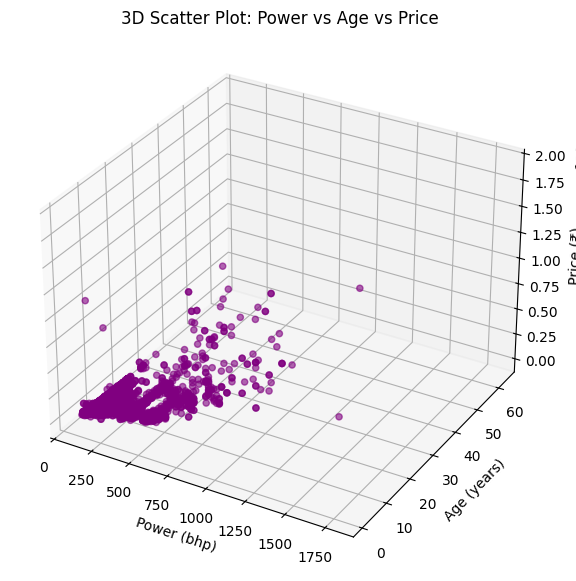

In [38]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: X=Power, Y=Age, Z=Price
ax.scatter(df_numeric['power'], df_numeric['age'], df_numeric['price'], c='purple', alpha=0.6)

ax.set_xlabel('Power (bhp)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Price (₹)')

ax.set_title('3D Scatter Plot: Power vs Age vs Price')
plt.show()

Visualized the combined effect of bike power and age on resale price using a 3D scatter plot — helping identify value patterns at a glance.


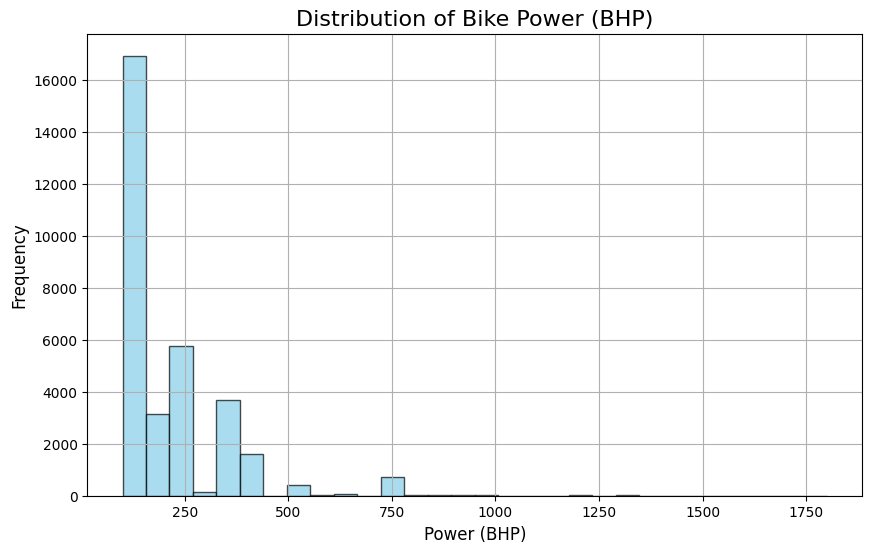

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['power'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Bike Power (BHP)', fontsize=16)
plt.xlabel('Power (BHP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

Plotted a histogram of bike power to observe the distribution pattern — revealing common BHP ranges and possible outliers.


C:\Users\IQ\AppData\Local\Temp\ipykernel_21796\840741745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='owner', y='power', palette='pastel')


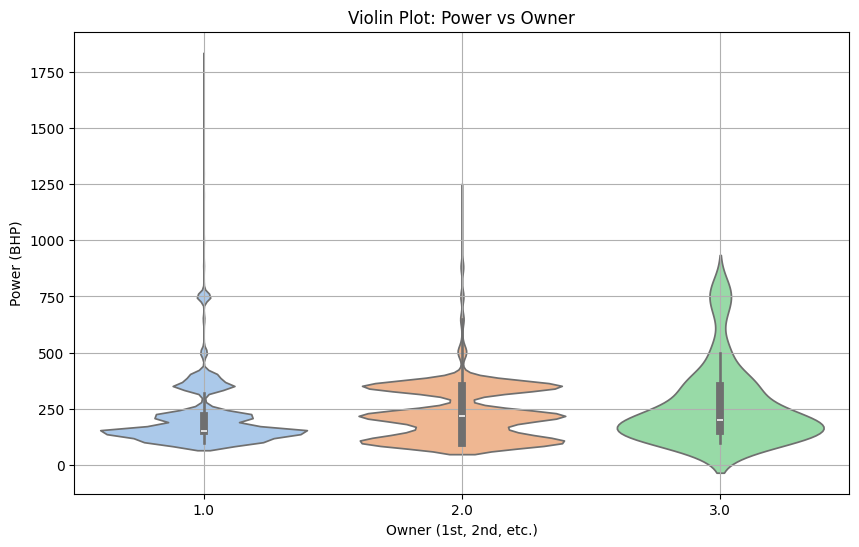

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='owner', y='power', palette='pastel')
plt.title('Violin Plot: Power vs Owner')
plt.xlabel('Owner (1st, 2nd, etc.)')
plt.ylabel('Power (BHP)')
plt.grid(True)
plt.show()

Used a violin plot to explore how bike power varies across ownership levels — highlighting differences in value retention across first-hand and multi-owner bikes.


In [41]:
import pickle as pk
pk.dump(model,open('model3.pkl','wb'))

In [42]:
# Ensure all required columns for the app are present and named correctly
required_cols = ['brand', 'bike_name', 'age', 'price', 'power', 'kms_driven', 'cc']
for col in required_cols:
    if col not in df.columns:
        df[col] = None  # Add missing columns as empty if needed
df.to_csv("Used_Bikes.csv", index=False)
print("Saved cleaned DataFrame to Used_Bikes.csv with required columns.")

Saved cleaned DataFrame to Used_Bikes.csv with required columns.


In [43]:
from ydata_profiling import ProfileReport
import pandas as pd

# Assume 'y' is already defined (your target variable: price)
y_df = pd.DataFrame(y, columns=['price'])

# Generate the profile report for target variable
profile = ProfileReport(y_df, title="Y Variable Profile Report - Price", explorative=True)

# Save or display
profile.to_file("price_profile_report.html")  # Opens in browser


c:\Users\IQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 86.79it/s]


## 📊 Final Summary: Used Bike Price Prediction Project

- Loaded and cleaned the dataset by removing irrelevant columns (`city`) and handling missing values using both row drops and mean imputation.
- Extracted useful features from `bike_name`, creating new columns like `model` and `maker` for better analysis.
- Converted categorical columns (`owner`, `maker`, `model`) into numeric form using manual mapping and label encoding.
- Created a numeric feature subset and split it into training and testing sets to build a regression model.
- Trained a `LinearRegression` model and evaluated it using R², MAE, and RMSE — gaining insights into prediction accuracy.
- Built a custom function to recommend bikes based on budget, brand, and kilometers driven.
- Visualized the dataset through various plots:  
  - 3D scatter (Power vs Age vs Price)  
  - Histogram (Power distribution)  
  - Violin plot (Power vs Owner)  
- Predicted the price of a custom sample bike using the trained model.

✅ This end-to-end project successfully demonstrates data preprocessing, feature engineering, model training, evaluation, and visualization — all tailored to the used bike market.
